# Customer Default Risk Prediction

In [11]:
##Import all the necessary Python libraries for data analysis, visualization, preprocessing, and machine learning.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

##Load the dataset
df = pd.read_csv("synthetic_dataset_10000x20.csv")

##Display the first 5 rows of the dataset
df.head()


,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
0,CUST006253,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,...,HS,Single,West,1,1,2020-07-05,6,0.404,0.141120,1
1,CUST004685,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,...,Bachelors,Married,East,0,0,2018-10-03,2,0.066,0.808496,1
2,CUST001732,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,...,Bachelors,Single,East,0,1,2018-05-30,2,0.325,0.494113,0
3,CUST004743,49,29049.0,6284.0,2485.0,1,707.477864,20881.0,36,2.7,...,HS,Married,South,0,1,2018-04-22,6,0.719,-0.982453,0
4,CUST004522,74,60063.0,924.0,3179.0,2,564.768511,19438.0,36,10.3,...,Masters,Single,West,0,0,2019-12-03,1,0.324,0.898708,1


## Step 1: Exploratory Data Analysis (EDA)

In [13]:
print(df.shape) ##checks the number of rows and columns
print(df.info()) ##provide details
df.describe(include="all") ##give summary statistics

(10000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          10000 non-null  object 
 1   age                  10000 non-null  int64  
 2   income               9682 non-null   float64
 3   savings              9689 non-null   float64
 4   monthly_expenses     9675 non-null   float64
 5   num_dependents       10000 non-null  int64  
 6   credit_score         9674 non-null   float64
 7   loan_amount          10000 non-null  float64
 8   loan_term_months     10000 non-null  int64  
 9   employment_years     10000 non-null  float64
 10  home_ownership       10000 non-null  object 
 11  education            10000 non-null  object 
 12  marital_status       10000 non-null  object 
 13  region               10000 non-null  object 
 14  recent_default       10000 non-null  int64  
 15  has_credit_card      1000

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
count,10000,10000.000000,9682.000000,9689.000000,9675.000000,10000.000000,9674.000000,10000.000000,10000.000000,10000.00000,...,10000,10000,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,4,4,NaN,NaN,1982,NaN,NaN,NaN,NaN
top,CUST006253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bachelors,Single,East,NaN,NaN,2018-06-22,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4443,4486,2553,NaN,NaN,14,NaN,NaN,NaN,NaN
mean,NaN,45.861600,59712.871411,5039.922489,2082.209612,1.214200,650.155438,16214.796900,45.642000,5.39701,...,NaN,NaN,NaN,0.047000,0.694800,NaN,3.011900,0.358156,-0.100387,0.513200
std,NaN,16.457987,39865.231489,5041.793583,1385.991787,1.108982,69.918297,16081.646814,15.475134,3.41370,...,NaN,NaN,NaN,0.211649,0.460515,NaN,2.003986,0.302606,0.667428,0.499851
min,NaN,18.000000,20001.000000,0.000000,200.000000,0.000000,363.077116,1000.000000,12.000000,0.00000,...,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.004000,-0.999923,0.000000
25%,NaN,32.000000,31300.500000,1476.000000,1471.000000,0.000000,602.189895,8508.500000,36.000000,2.70000,...,NaN,NaN,NaN,0.000000,0.000000,NaN,1.000000,0.132000,-0.756802,0.000000
50%,NaN,46.000000,47301.500000,3499.000000,2007.000000,1.000000,649.808322,15174.500000,48.000000,5.10000,...,NaN,NaN,NaN,0.000000,1.000000,NaN,3.000000,0.275000,-0.157746,1.000000
75%,NaN,60.000000,75164.250000,6986.000000,2557.000000,2.000000,697.537432,21843.750000,60.000000,7.70000,...,NaN,NaN,NaN,0.000000,1.000000,NaN,5.000000,0.508000,0.515501,1.000000


In [14]:
# Missing values
print(df.isnull().sum()) 

customer_id              0
age                      0
income                 318
savings                311
monthly_expenses       325
num_dependents           0
credit_score           326
loan_amount              0
loan_term_months         0
employment_years         0
home_ownership           0
education                0
marital_status           0
region                   0
recent_default           0
has_credit_card          0
signup_date              0
signup_dayofweek         0
debt_to_income           0
sin_age                  0
target_default_risk      0
dtype: int64


In [15]:
df.drop('customer_id',axis=1,inplace=True)

In [16]:
df.head()

,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,home_ownership,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
0,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,RENT,HS,Single,West,1,1,2020-07-05,6,0.404,0.141120,1
1,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,RENT,Bachelors,Married,East,0,0,2018-10-03,2,0.066,0.808496,1
2,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,OWN,Bachelors,Single,East,0,1,2018-05-30,2,0.325,0.494113,0
3,49,29049.0,6284.0,2485.0,1,707.477864,20881.0,36,2.7,OWN,HS,Married,South,0,1,2018-04-22,6,0.719,-0.982453,0
4,74,60063.0,924.0,3179.0,2,564.768511,19438.0,36,10.3,MORTGAGE,Masters,Single,West,0,0,2019-12-03,1,0.324,0.898708,1


In [17]:

# Unique values for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].unique()[:10])


home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
education ['HS' 'Bachelors' 'Masters' 'Other' 'PhD' 'Bachlors']
marital_status ['Single' 'Married' 'Divorced' 'Widowed']
region ['West' 'East' 'South' 'North']
signup_date ['2020-07-05' '2018-10-03' '2018-05-30' '2018-04-22' '2019-12-03'
 '2018-11-08' '2021-12-14' '2019-10-02' '2018-04-18' '2022-02-05']


In [18]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_cols

['age',
 'income',
 'savings',
 'monthly_expenses',
 'num_dependents',
 'credit_score',
 'loan_amount',
 'loan_term_months',
 'employment_years',
 'recent_default',
 'has_credit_card',
 'signup_dayofweek',
 'debt_to_income',
 'sin_age',
 'target_default_risk']

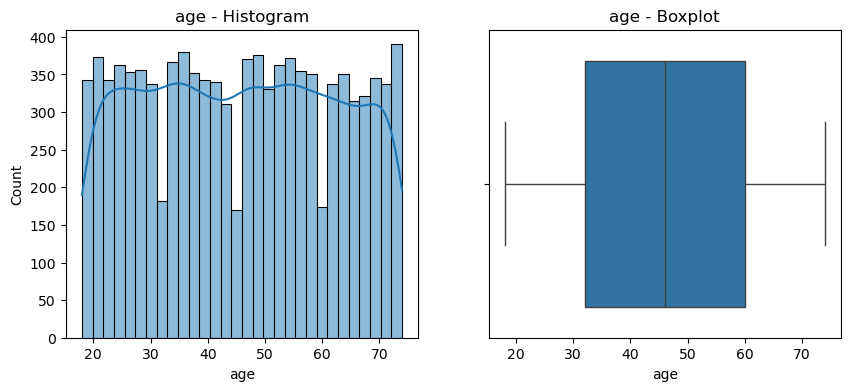

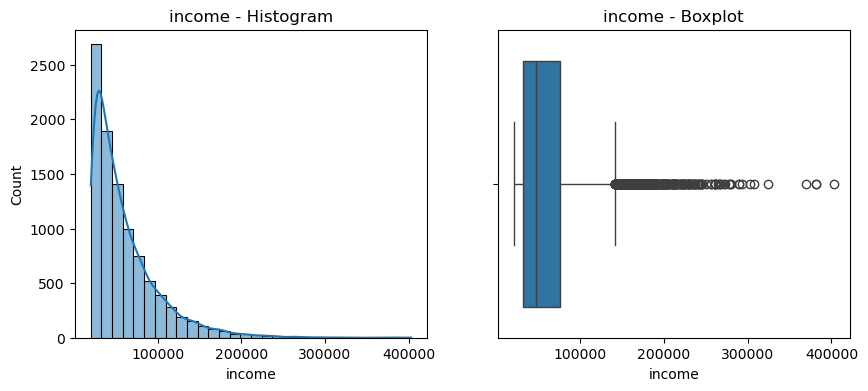

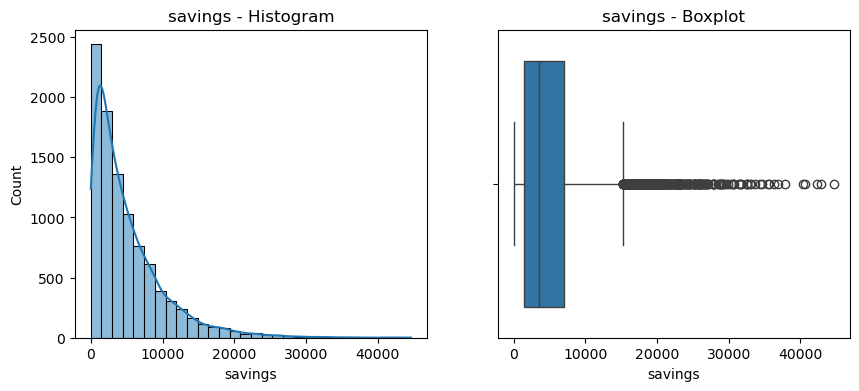

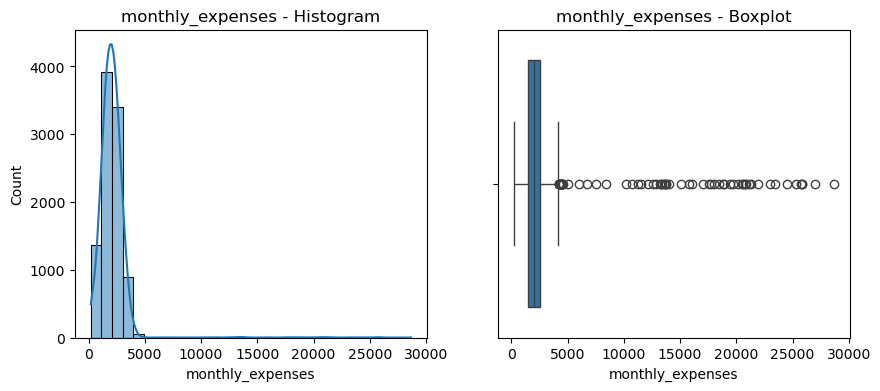

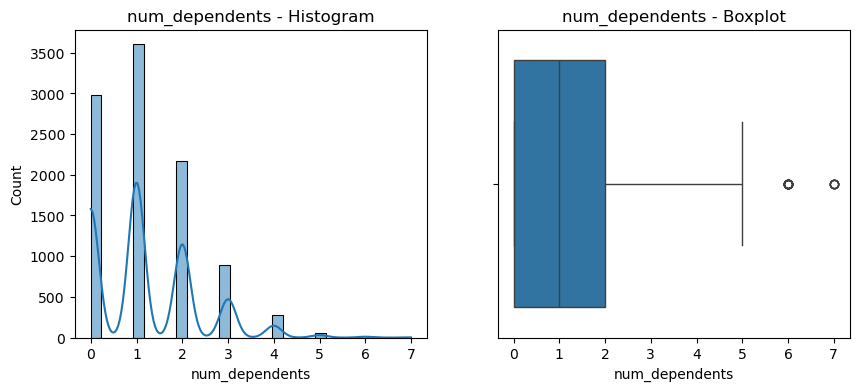

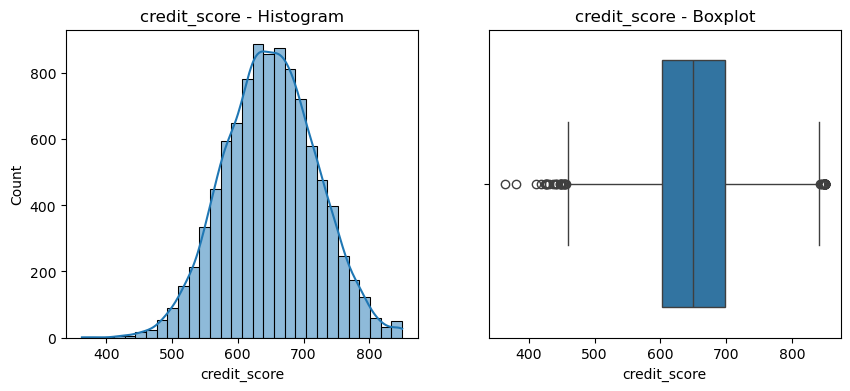

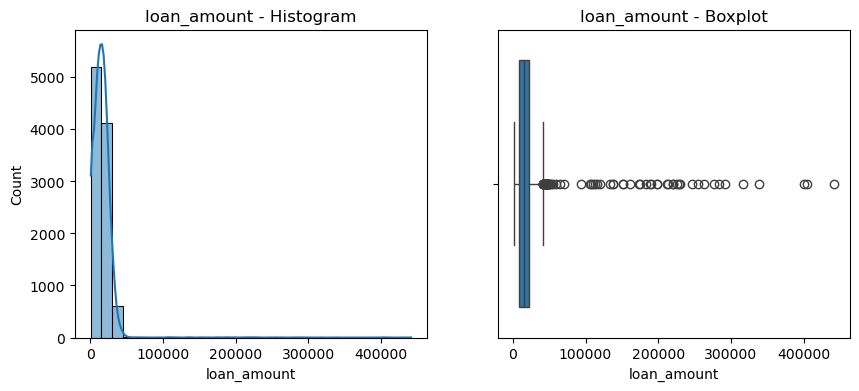

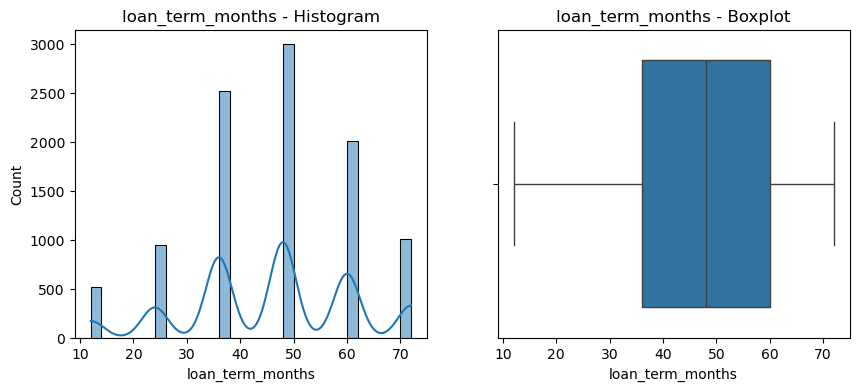

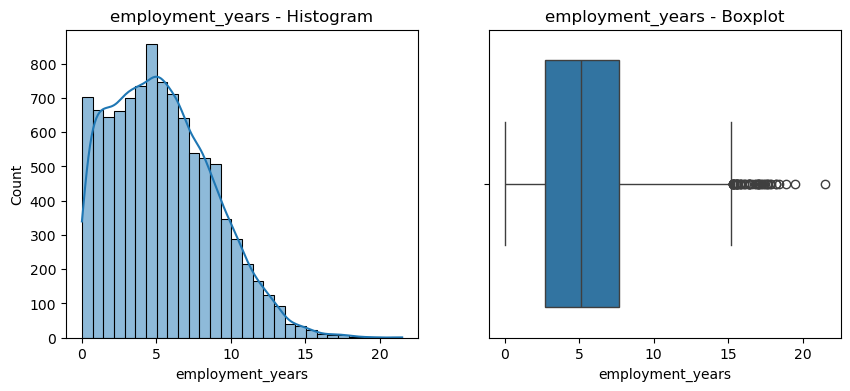

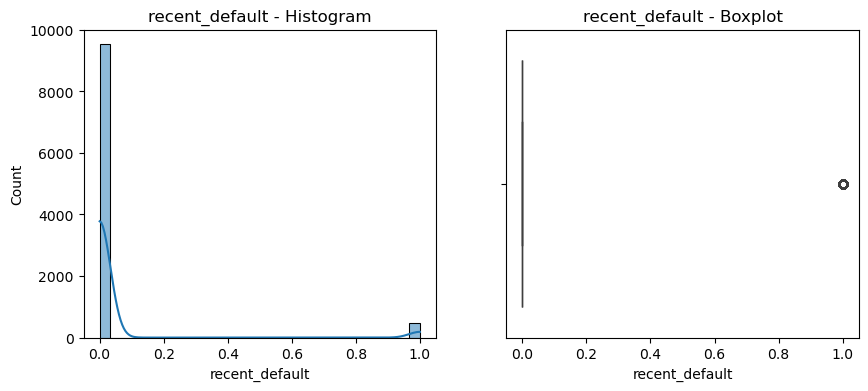

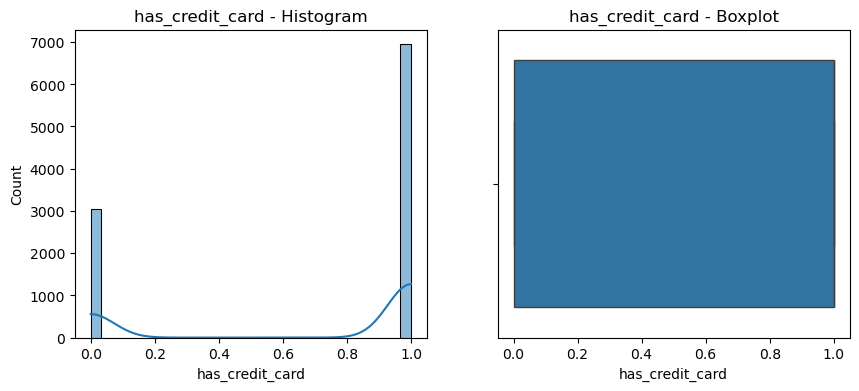

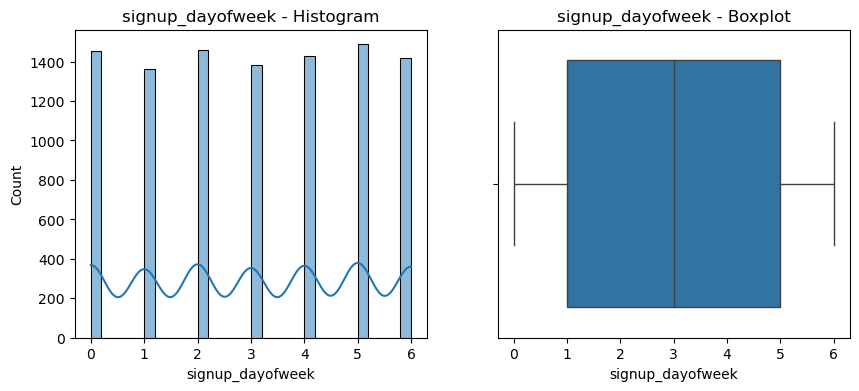

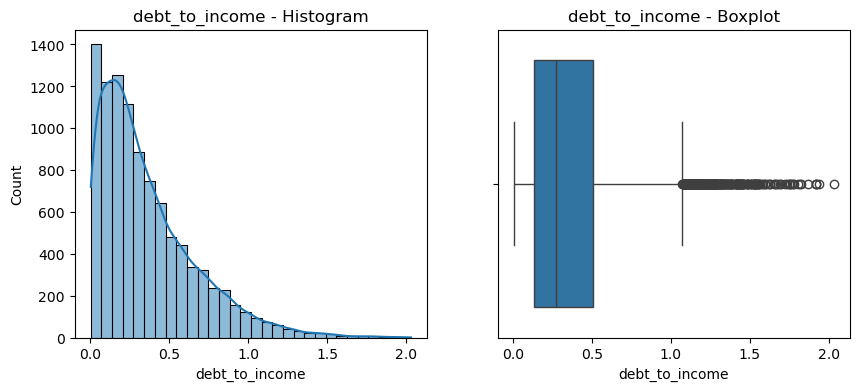

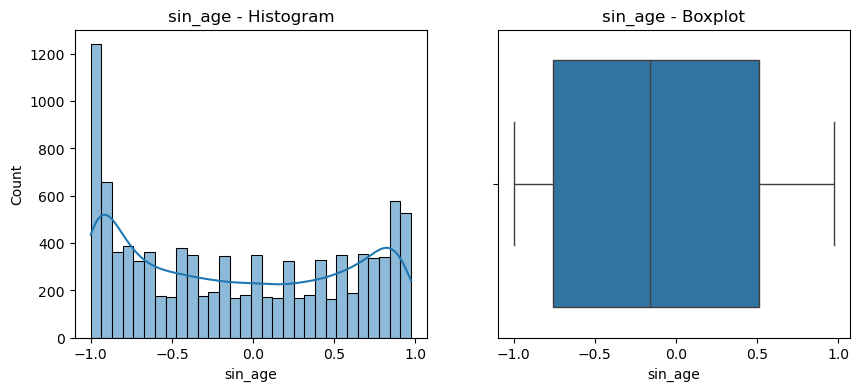

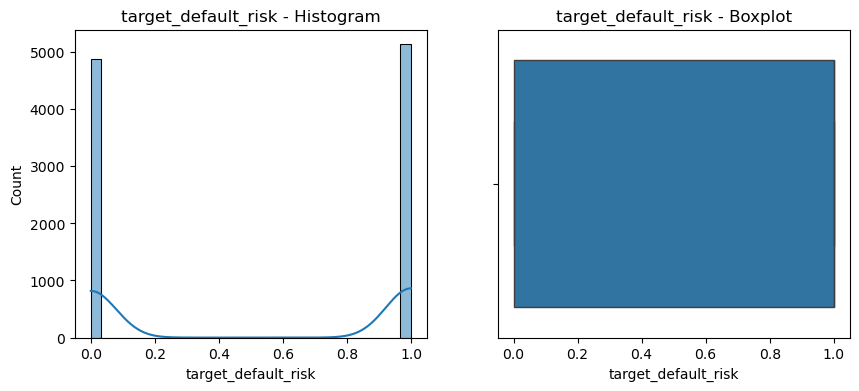

In [19]:
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'{col} - Histogram')
    ##boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'{col} - Boxplot')
    plt.show()

In [20]:
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
categorical_cols

['home_ownership', 'education', 'marital_status', 'region', 'signup_date']

In [21]:
if 'signup_date' in categorical_cols:
    print(categorical_cols.remove('signup_date'))
    

None


In [22]:
categorical_cols

['home_ownership', 'education', 'marital_status', 'region']


Value counts for home_ownership:
home_ownership
RENT        4524
OWN         2526
MORTGAGE    2498
OTHER        452
Name: count, dtype: int64


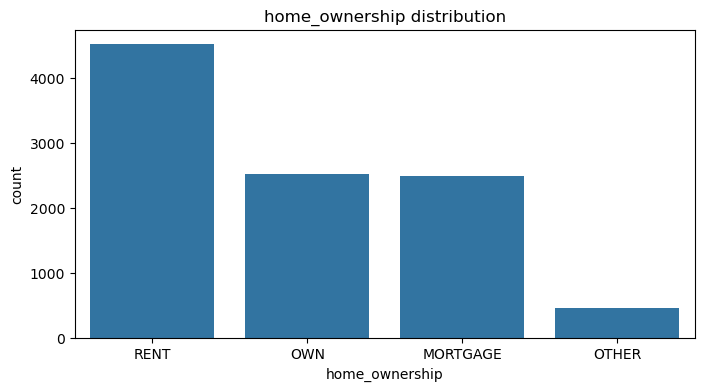


Value counts for education:
education
Bachelors    4443
HS           2546
Masters      1962
Other         500
PhD           462
Bachlors       87
Name: count, dtype: int64


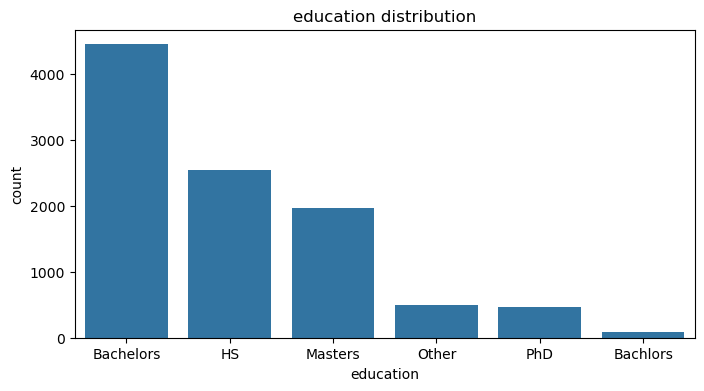


Value counts for marital_status:
marital_status
Single      4486
Married     4002
Divorced    1000
Widowed      512
Name: count, dtype: int64


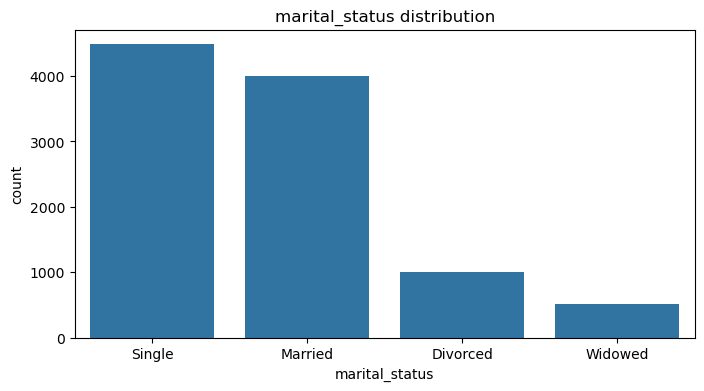


Value counts for region:
region
East     2553
South    2523
North    2479
West     2445
Name: count, dtype: int64


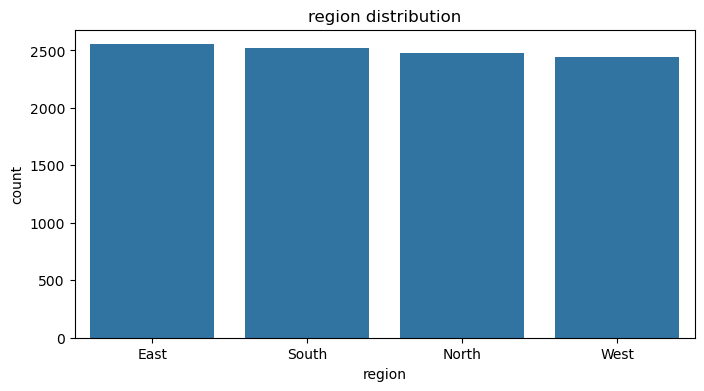

In [23]:
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False).head(10))   
    ##Bar Chart
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"{col} distribution")
    plt.show()

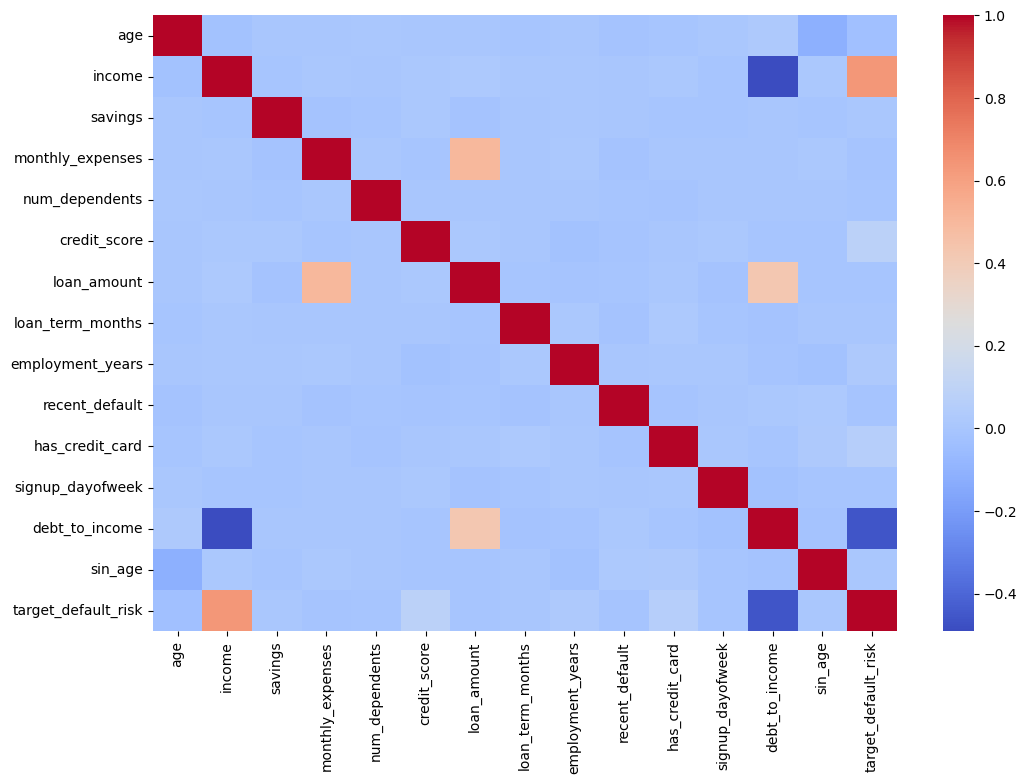

In [24]:

# Correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.show()

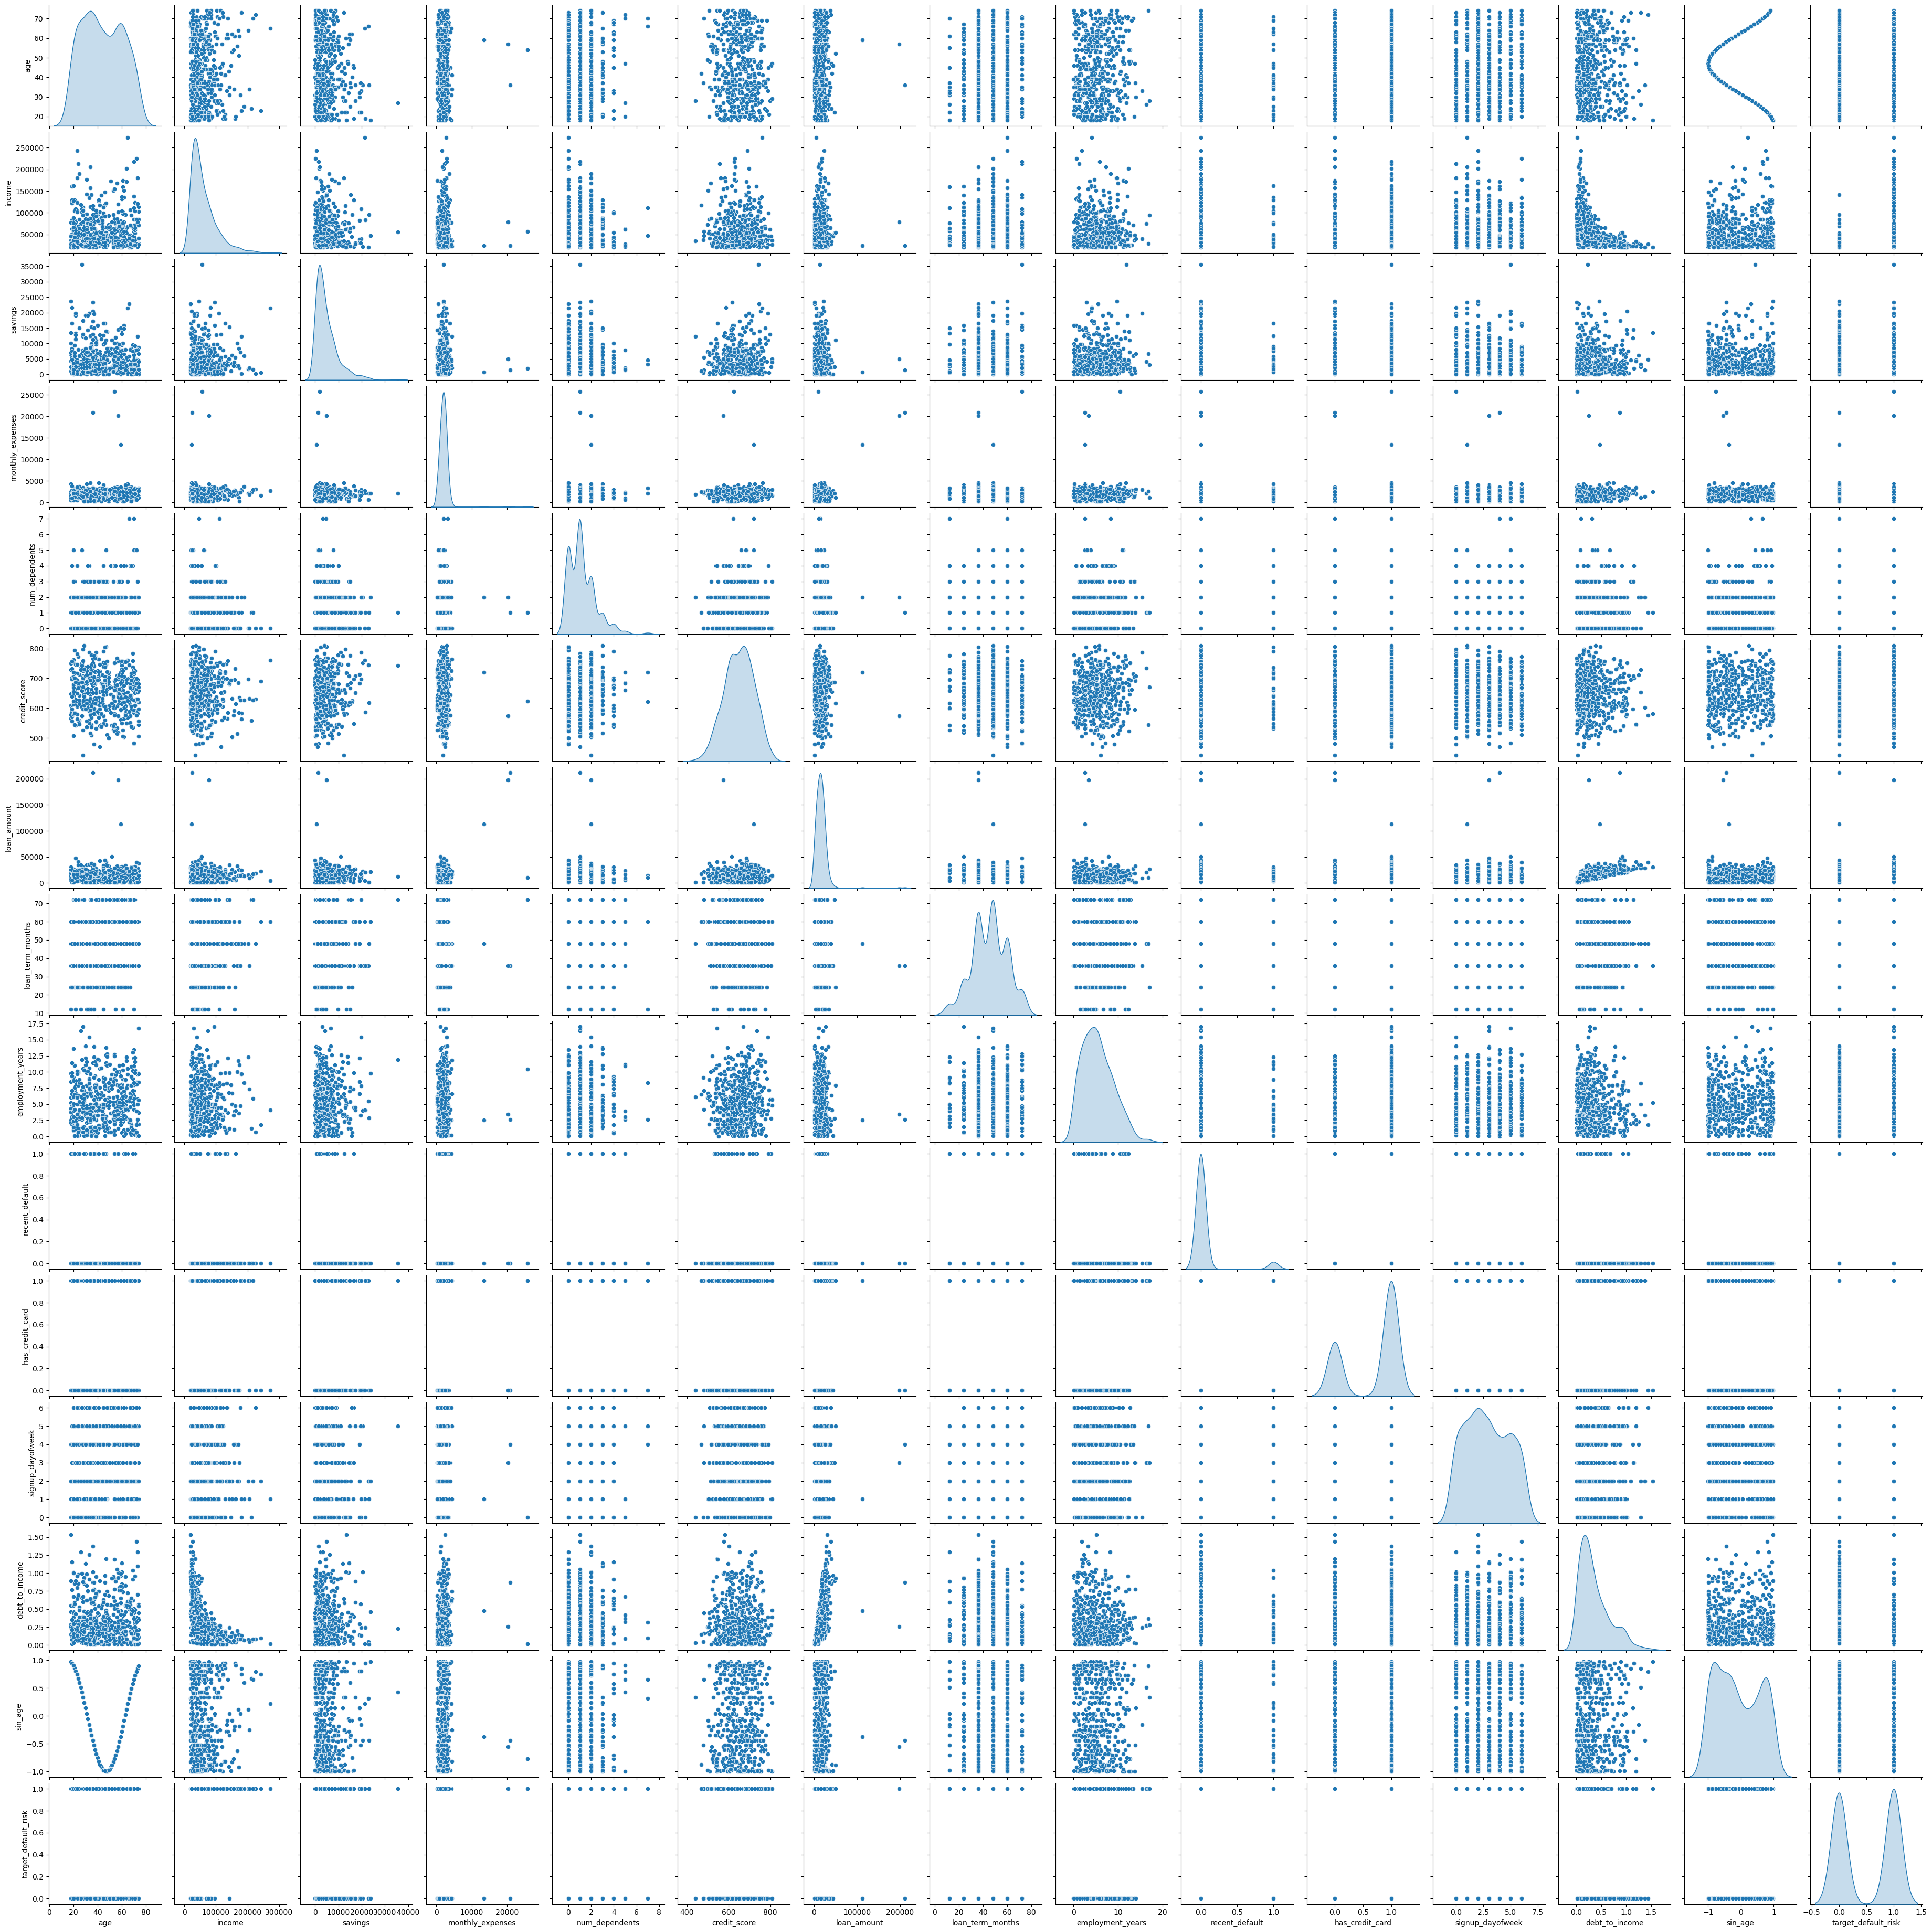

In [25]:
## Pair Plot
sns.pairplot(df[numeric_cols].sample(500), diag_kind='kde')
plt.show()

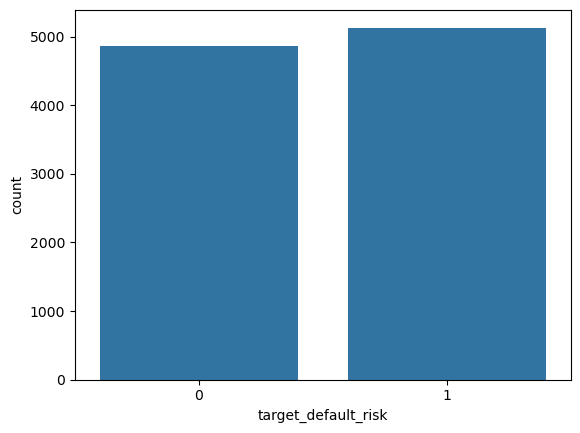

target_default_risk
1    0.5132
0    0.4868
Name: proportion, dtype: float64


In [26]:

# Target variable balance
sns.countplot(x="target_default_risk", data=df)
plt.show()

print(df['target_default_risk'].value_counts(normalize=True))


## Step 2: Data Preprocessing

In [28]:
##typo fix
if "education" in df.columns:
    df['education'] = df['education'].replace({'Bachlors': 'Bachelors'})

# Handle dates
if "signup_date" in df.columns:
    df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')
    df['signup_year'] = df['signup_date'].dt.year
    df['signup_month'] = df['signup_date'].dt.month
    df['signup_day'] = df['signup_date'].dt.day
    df['days_since_signup'] = (pd.Timestamp.today() - df['signup_date']).dt.days
    df.drop(columns=['signup_date'], inplace=True)


In [29]:

X = df.drop( 'target_default_risk',axis=1)
y = df['target_default_risk']


# Identify numeric & categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Education is ordinal, others nominal
ordinal_features = ['education'] if 'education' in categorical_features else []
nominal_features = list(set(categorical_features) - set(ordinal_features))


In [30]:

# Pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, nominal_features),
    ('ord', ordinal_pipeline, ordinal_features)
])


In [31]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Remove target column
if 'target_default_risk' in num_cols:
    num_cols.remove('target_default_risk')

# Skip columns that are not truly continuous (like years, encoded IDs, counts)
skip_cols = ['signup_year']   
cont_cols = [col for col in num_cols if col not in skip_cols]

# Apply IQR-based capping
for col in cont_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count before
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: {outliers} outliers before capping")
    
    # Cap values
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))
    
    # Count after
    outliers_after = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: {outliers_after} outliers after capping\n")


age: 0 outliers before capping
age: 0 outliers after capping

income: 479 outliers before capping
income: 0 outliers after capping

savings: 472 outliers before capping
savings: 0 outliers after capping

monthly_expenses: 70 outliers before capping
monthly_expenses: 0 outliers after capping

num_dependents: 24 outliers before capping
num_dependents: 0 outliers after capping

credit_score: 62 outliers before capping
credit_score: 0 outliers after capping

loan_amount: 89 outliers before capping
loan_amount: 0 outliers after capping

loan_term_months: 0 outliers before capping
loan_term_months: 0 outliers after capping

employment_years: 51 outliers before capping
employment_years: 0 outliers after capping

recent_default: 470 outliers before capping
recent_default: 0 outliers after capping

has_credit_card: 0 outliers before capping
has_credit_card: 0 outliers after capping

signup_dayofweek: 0 outliers before capping
signup_dayofweek: 0 outliers after capping

debt_to_income: 318 outli

## Step 3: Model Building & Evaluation

In [33]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:

# Evaluation function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1:", f1_score(y_test, preds))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))
    print("\nClassification Report:\n", classification_report(y_test, preds))
    return model


In [35]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocess', preprocessor), ('model', model)])
    evaluate_model(name, pipe, X_train, X_test, y_train, y_test)





Logistic Regression Results:
Accuracy: 0.9345
Precision: 0.959917780061665
Recall: 0.9103313840155945
F1: 0.9344672336168084

Confusion Matrix:
 [[935  39]
 [ 92 934]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       974
           1       0.96      0.91      0.93      1026

    accuracy                           0.93      2000
   macro avg       0.94      0.94      0.93      2000
weighted avg       0.94      0.93      0.93      2000


Decision Tree Results:
Accuracy: 0.9235
Precision: 0.9317507418397626
Recall: 0.9181286549707602
F1: 0.9248895434462445

Confusion Matrix:
 [[905  69]
 [ 84 942]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       974
           1       0.93      0.92      0.92      1026

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg      

C:\Users\Welcome\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:08:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Results:
Accuracy: 0.9545
Precision: 0.9615004935834156
Recall: 0.949317738791423
F1: 0.9553702795487984

Confusion Matrix:
 [[935  39]
 [ 52 974]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       974
           1       0.96      0.95      0.96      1026

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



## Step 4: Hyperparameter Tuning

In [37]:
# Parameter grids for all 5 models
param_grids = {
    "Logistic Regression": {
        'model__C': [0.01, 0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']
    },
    "Decision Tree": {
        'model__max_depth': [5, 10, 15, None],
        'model__min_samples_split': [2, 5, 10]
    },
    "SVM": {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    },
    "Random Forest": {
        'model__n_estimators': [200, 300],
        'model__max_depth': [10, 15, None],
        'model__min_samples_split': [2, 5]
    },
    "XGBoost": {
        'model__n_estimators': [200, 300],
        'model__max_depth': [5, 7, 9],
        'model__learning_rate': [0.01, 0.05, 0.1]
    }
}


In [38]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),  # probability=True for stacking later
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [42]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

best_models = {}

for name, model in models.items():
    print(f"\n🔍 Tuning {name}...")
    pipe = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    
    grid = GridSearchCV(pipe, param_grids[name], cv=3, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print("✅ Best Params for", name, ":", grid.best_params_)
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    # Evaluate
    evaluate_model(f"{name} (Tuned)", best_model, X_train, X_test, y_train, y_test)



🔍 Tuning Logistic Regression...
✅ Best Params for Logistic Regression : {'model__C': 10, 'model__solver': 'liblinear'}

Logistic Regression (Tuned) Results:
Accuracy: 0.9345
Precision: 0.9618163054695562
Recall: 0.9083820662768031
F1: 0.9343358395989975

Confusion Matrix:
 [[937  37]
 [ 94 932]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       974
           1       0.96      0.91      0.93      1026

    accuracy                           0.93      2000
   macro avg       0.94      0.94      0.93      2000
weighted avg       0.94      0.93      0.93      2000


🔍 Tuning Decision Tree...
✅ Best Params for Decision Tree : {'model__max_depth': 5, 'model__min_samples_split': 2}

Decision Tree (Tuned) Results:
Accuracy: 0.9365
Precision: 0.9411187438665358
Recall: 0.9346978557504874
F1: 0.9378973105134474

Confusion Matrix:
 [[914  60]
 [ 67 959]]

Classification Report:
               precision    recall  f1

C:\Users\Welcome\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\Welcome\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:22:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best Params for XGBoost : {'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 300}


C:\Users\Welcome\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:22:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost (Tuned) Results:
Accuracy: 0.962
Precision: 0.96751968503937
Recall: 0.9580896686159844
F1: 0.9627815866797258

Confusion Matrix:
 [[941  33]
 [ 43 983]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       974
           1       0.97      0.96      0.96      1026

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



# ANN

In [43]:
!pip install tensorflow

In [44]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [46]:
# Transform train and test using preprocessor
X_train_ann = preprocessor.fit_transform(X_train)
X_test_ann = preprocessor.transform(X_test)

print("Train shape:", X_train_ann.shape)
print("Test shape:", X_test_ann.shape)


Train shape: (8000, 28)
Test shape: (2000, 28)


In [47]:
# Define ANN model
ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_ann.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')   # Binary classification
])

# Compile
ann.compile(optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])


C:\Users\Welcome\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
history = ann.fit(
    X_train_ann, y_train,
    validation_data=(X_test_ann, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8074 - loss: 0.4334 - val_accuracy: 0.9155 - val_loss: 0.2733
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8963 - loss: 0.3060 - val_accuracy: 0.9365 - val_loss: 0.2446
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9084 - loss: 0.2772 - val_accuracy: 0.9355 - val_loss: 0.2323
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9162 - loss: 0.2611 - val_accuracy: 0.9355 - val_loss: 0.2235
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9215 - loss: 0.2499 - val_accuracy: 0.9445 - val_loss: 0.2107
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9236 - loss: 0.2370 - val_accuracy: 0.9455 - val_loss: 0.2052
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9305 - loss: 0.2276 - val_accuracy: 0.9445 - val_loss: 0.1998
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9314 - loss: 0.2157 - val_accuracy: 0

In [56]:
# Evaluate on test data
loss, acc = ann.evaluate(X_test_ann, y_test, verbose=0)
print(f"\n🔍 ANN Test Accuracy: {acc:.2%}")

# Predictions
y_pred_ann = (ann.predict(X_test_ann) > 0.5).astype("int32")

from sklearn.metrics import classification_report
print("\nClassification Report (ANN):\n", classification_report(y_test, y_pred_ann))



🔍 ANN Test Accuracy: 95.40%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report (ANN):
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       974
           1       0.96      0.95      0.95      1026

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



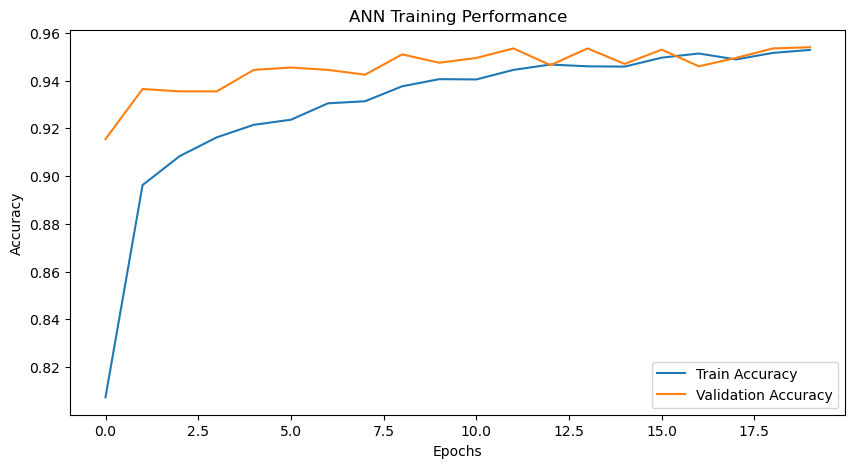

In [58]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("ANN Training Performance")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
